In [5]:
import pandas as pd

In [21]:
dada = pd.read_csv("merged_bo_logs.csv")
#dada = dada[~dada["vext_file"].str.contains("exp", na=False)]
dada.shape # 608, 7

(413, 10)

In [24]:
dada = dada[dada["best_value"] == dada["global_best_value"]]

dada.shape # 407, 7

dada_sort = dada.sort_values("n_iterations", ascending=True)
dada_sort

,timestamp,temperature_kelvin,pressure_bar,n_candidates,n_iterations,best_value,global_best_value,found_global_best,note,source_file
144,2025-10-27T09:10:08,500.0,64.642857,2032,10,0.003209,0.003209,True,NaN,bo_log_cleankond_vext20b_exp.csv
137,2025-10-27T09:09:55,500.0,15.142857,2032,10,0.002238,0.002238,True,NaN,bo_log_cleankond_vext20b_exp.csv
138,2025-10-27T09:09:57,500.0,22.214286,2032,10,0.002573,0.002573,True,NaN,bo_log_cleankond_vext20b_exp.csv
139,2025-10-27T09:09:59,500.0,29.285714,2032,10,0.002778,0.002778,True,NaN,bo_log_cleankond_vext20b_exp.csv
140,2025-10-27T09:10:01,500.0,36.357143,2032,10,0.002918,0.002918,True,NaN,bo_log_cleankond_vext20b_exp.csv
...,...,...,...,...,...,...,...,...,...,...
276,2025-10-26T17:17:15,450.0,43.428571,2032,32,0.003355,0.003355,True,NaN,bo_log_cleankond_vext50b.csv
150,2025-10-26T16:59:09,300.0,1.000000,2032,33,0.003369,0.003369,True,NaN,bo_log_cleankond_vext20b.csv
257,2025-10-26T17:15:57,400.0,15.142857,2032,33,0.003335,0.003335,True,NaN,bo_log_cleankond_vext50b.csv
258,2025-10-26T17:16:04,400.0,22.214286,2032,37,0.003431,0.003431,True,NaN,bo_log_cleankond_vext50b.csv


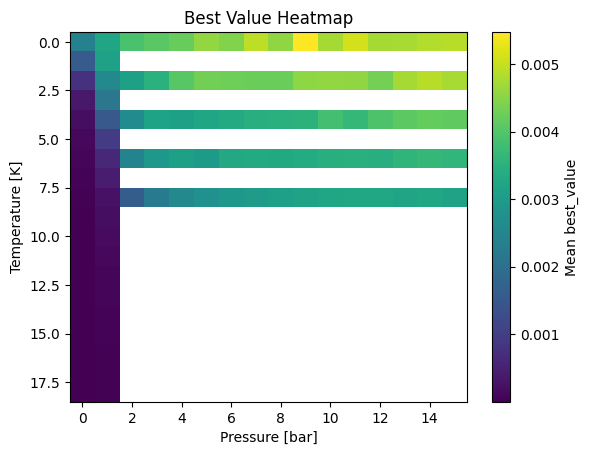

In [25]:
pivot = data.pivot_table(values="best_value", index="temperature_kelvin", columns="pressure_bar", aggfunc="mean")
plt.figure()
plt.imshow(pivot, aspect="auto")
plt.colorbar(label="Mean best_value")
plt.xlabel("Pressure [bar]")
plt.ylabel("Temperature [K]")
plt.title("Best Value Heatmap")
plt.show()

<Figure size 1200x500 with 0 Axes>

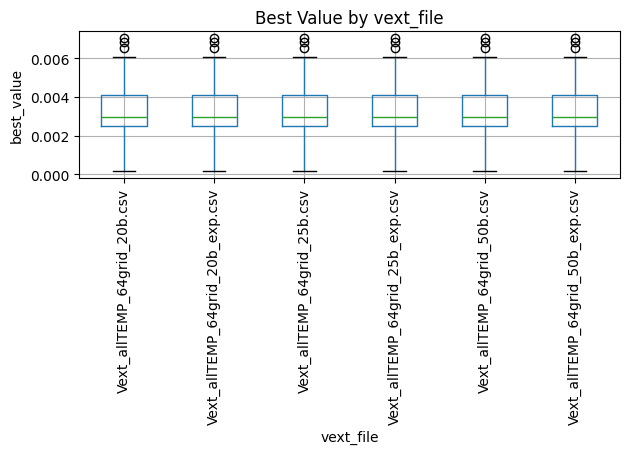

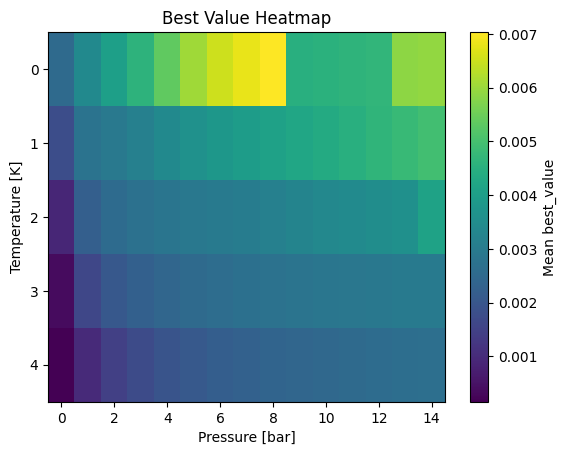

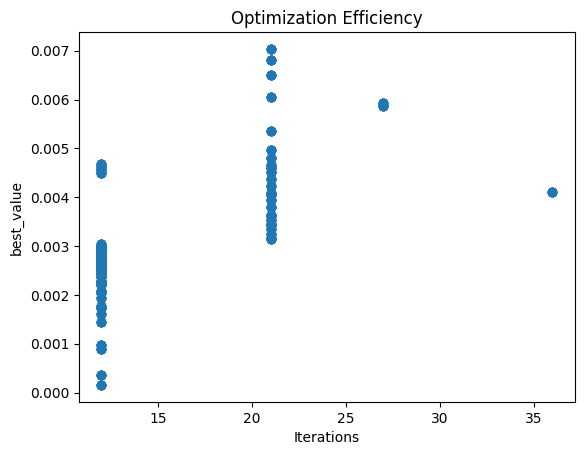

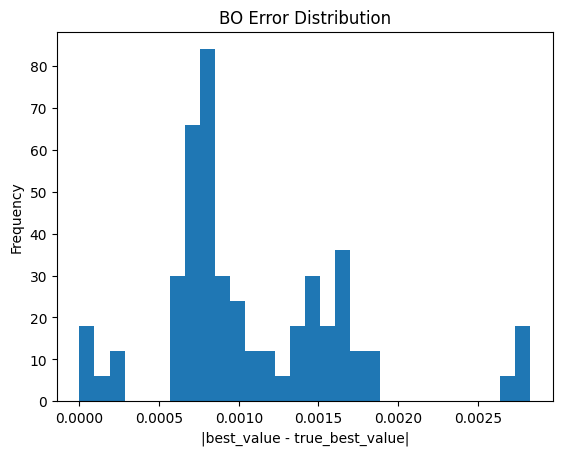

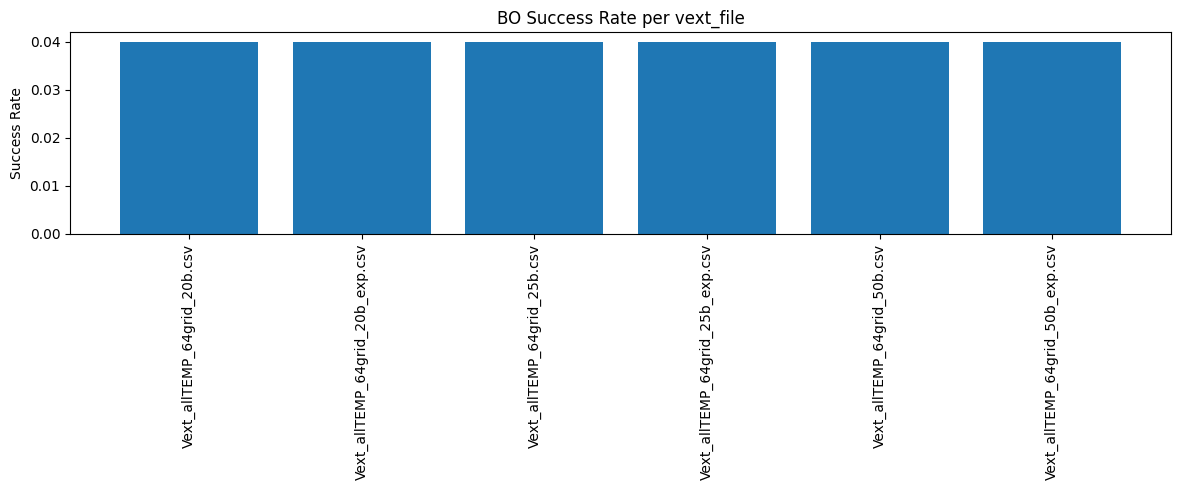

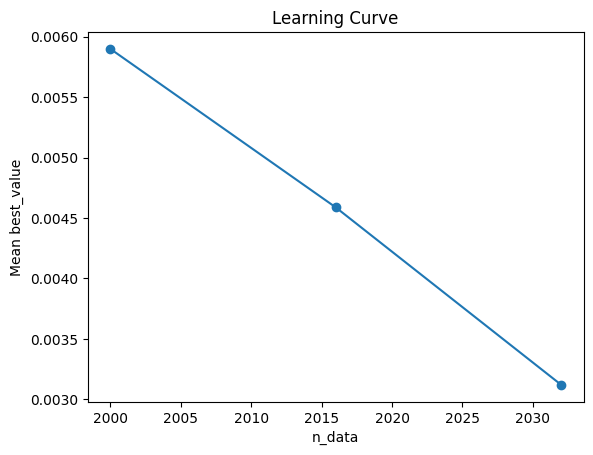

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Daten laden
df = pd.read_csv("/Users/danielbock/MASTERTHESIS/MASTA/Results/BO_log_allVersion_frfr.csv")

# =====================================================
# 1. Boxplot: best_value je vext_file (Feature-Version)
# =====================================================
plt.figure(figsize=(12,5))
df.boxplot(column="best_value", by="vext_file", rot=90)
plt.title("Best Value by vext_file")
plt.suptitle("")
plt.xlabel("vext_file")
plt.ylabel("best_value")
plt.tight_layout()
plt.show()

# =====================================================
# 2. Heatmap: Mittelwert best_value über Pressure & Temperature
# =====================================================
pivot = df.pivot_table(values="best_value", index="temperature", columns="pressure", aggfunc="mean")
plt.figure()
plt.imshow(pivot, aspect="auto")
plt.colorbar(label="Mean best_value")
plt.xlabel("Pressure [bar]")
plt.ylabel("Temperature [K]")
plt.title("Best Value Heatmap")
plt.show()

# =====================================================
# 3. Scatter: Iterations vs best_value (Optimierungseffizienz)
# =====================================================
plt.figure()
plt.scatter(df["iterations"], df["best_value"])
plt.xlabel("Iterations")
plt.ylabel("best_value")
plt.title("Optimization Efficiency")
plt.show()

# =====================================================
# 4. Histogramm: Fehler zwischen gefundenem Optimum und wahrem Optimum
# =====================================================
error = (df["best_value"] - df["true_best_value"]).abs()
plt.figure()
plt.hist(error, bins=30)
plt.xlabel("|best_value - true_best_value|")
plt.ylabel("Frequency")
plt.title("BO Error Distribution")
plt.show()

# =====================================================
# 5. Erfolg je vext_file (Best Value = True Best Value)
# =====================================================
success_rate = (df["best_value"] == df["true_best_value"]).groupby(df["vext_file"]).mean()
plt.figure(figsize=(12,5))
plt.bar(success_rate.index, success_rate.values)
plt.xticks(rotation=90)
plt.ylabel("Success Rate")
plt.title("BO Success Rate per vext_file")
plt.tight_layout()
plt.show()

# =====================================================
# 6. Lernkurve: best_value vs Anzahl Trainingsdaten
# =====================================================
grouped = df.groupby("n_data")["best_value"].mean()
plt.figure()
plt.plot(grouped.index, grouped.values, marker="o")
plt.xlabel("n_data")
plt.ylabel("Mean best_value")
plt.title("Learning Curve")
plt.show()


In [18]:
import pandas as pd
import glob
import os

# Alle passenden CSV-Dateien finden (anpassen falls nötig)
csv_files = glob.glob("bo_log_*.csv")

merged_df = pd.DataFrame()

for file in csv_files:
    df = pd.read_csv(file)
    df["source_file"] = os.path.basename(file)  # Dateiname als zusätzliche Info
    merged_df = pd.concat([merged_df, df], ignore_index=True)

# Ergebnis speichern
merged_df.to_csv("merged_bo_logs.csv", index=False)

print(f"Fertig! {len(csv_files)} Dateien wurden gemerged -> merged_bo_logs.csv")


Fertig! 6 Dateien wurden gemerged -> merged_bo_logs.csv


In [20]:
data = pd.read_csv("merged_bo_logs.csv")
data

,timestamp,temperature_kelvin,pressure_bar,n_candidates,n_iterations,best_value,global_best_value,found_global_best,note,source_file
0,2025-10-27T09:14:01,300.0,1.000000,2032,16,0.002523,0.003369,False,NaN,bo_log_cleankond_vext100b_exp.csv
1,2025-10-27T09:14:04,300.0,8.071429,2032,16,0.004123,0.005249,False,NaN,bo_log_cleankond_vext100b_exp.csv
2,2025-10-27T09:14:08,300.0,15.142857,2032,24,0.004042,0.005844,False,NaN,bo_log_cleankond_vext100b_exp.csv
3,2025-10-27T09:14:11,300.0,22.214286,2032,12,0.003988,0.006082,False,NaN,bo_log_cleankond_vext100b_exp.csv
4,2025-10-27T09:14:13,300.0,29.285714,2032,12,0.004199,0.006219,False,NaN,bo_log_cleankond_vext100b_exp.csv
...,...,...,...,...,...,...,...,...,...,...
408,2025-10-26T16:50:19,700.0,1.000000,245,22,0.000039,0.000039,True,NaN,bo_log_dft_data_clean_vext20b.csv
409,2025-10-26T16:50:23,725.0,0.100000,245,23,0.000003,0.000003,True,NaN,bo_log_dft_data_clean_vext20b.csv
410,2025-10-26T16:50:27,725.0,1.000000,245,22,0.000032,0.000032,True,NaN,bo_log_dft_data_clean_vext20b.csv
411,2025-10-26T16:50:30,750.0,0.100000,245,19,0.000003,0.000003,True,NaN,bo_log_dft_data_clean_vext20b.csv
